In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from icwaves.evaluation.config import EvalConfig
from icwaves.evaluation.evaluation import eval_classifier_per_subject_brain_F1
from icwaves.evaluation.iclabel import calculate_iclabel_f1_scores
from icwaves.viz import plot_line_with_error_area

In [2]:
root = Path().absolute().parent

validation_times = np.r_[
    [9.0, 19.5, 30.0, 39.0, 49.5, 60],
    np.arange(2 * 60, 5 * 60 + 1, 60),
    np.arange(5 * 60, 5 * 60 + 1, 60),
    np.arange(10 * 60, 50 * 60 + 1, 5 * 60),
].astype(float)
mean_std_df = {}
for eval_dataset in ["cue", "emotion_study"]:
    mean_std_df[eval_dataset] = {}
    for feature_extractor_str in ["bowav", "psd_autocorr", "bowav_psd_autocorr"]:
        mean_std_df[eval_dataset][feature_extractor_str] = {}
        for classifier_type in ["random_forest", "ensembled_logistic"]:
            mean_std_df[eval_dataset][feature_extractor_str][classifier_type] = {}
            for validation_segment_len in [300, -1]:
                print(
                    f"eval_dataset: {eval_dataset}, feature_extractor_str: {feature_extractor_str}, classifier_type: {classifier_type}, validation_segment_len: {validation_segment_len}"
                )
                config = EvalConfig(
                    eval_dataset=eval_dataset,
                    feature_extractor=feature_extractor_str,
                    classifier_type=classifier_type,
                    validation_segment_length=validation_segment_len,
                    root=root,
                )
                try:
                    mean_std_df[eval_dataset][feature_extractor_str][classifier_type][
                        validation_segment_len
                    ] = eval_classifier_per_subject_brain_F1(
                        config,
                        None,
                        None,
                        validation_times,
                        None,
                        None,
                        None,
                    )
                except:
                    continue

eval_dataset: cue, feature_extractor_str: bowav, classifier_type: random_forest, validation_segment_len: 300
eval_dataset: cue, feature_extractor_str: bowav, classifier_type: random_forest, validation_segment_len: -1
Loading cached results from /Users/gcarlmen/personal_repos/ICWaves/results/cue/evaluation/eval_brain_f1_random_forest_bowav_none.csv
eval_dataset: cue, feature_extractor_str: bowav, classifier_type: ensembled_logistic, validation_segment_len: 300
eval_dataset: cue, feature_extractor_str: bowav, classifier_type: ensembled_logistic, validation_segment_len: -1
eval_dataset: cue, feature_extractor_str: psd_autocorr, classifier_type: random_forest, validation_segment_len: 300
eval_dataset: cue, feature_extractor_str: psd_autocorr, classifier_type: random_forest, validation_segment_len: -1
Loading cached results from /Users/gcarlmen/personal_repos/ICWaves/results/cue/evaluation/eval_brain_f1_random_forest_psd_autocorr_none.csv
eval_dataset: cue, feature_extractor_str: psd_autoco

KeyError: bowav/logistic not found. Skipping...
KeyError: psd_autocorr/logistic not found. Skipping...
KeyError: bowav_psd_autocorr/logistic not found. Skipping...
KeyError: bowav/ensembled_logistic not found. Skipping...
KeyError: psd_autocorr/ensembled_logistic not found. Skipping...
KeyError: bowav/logistic not found. Skipping...
KeyError: psd_autocorr/logistic not found. Skipping...
KeyError: bowav_psd_autocorr/logistic not found. Skipping...
KeyError: bowav/ensembled_logistic not found. Skipping...
KeyError: psd_autocorr/ensembled_logistic not found. Skipping...


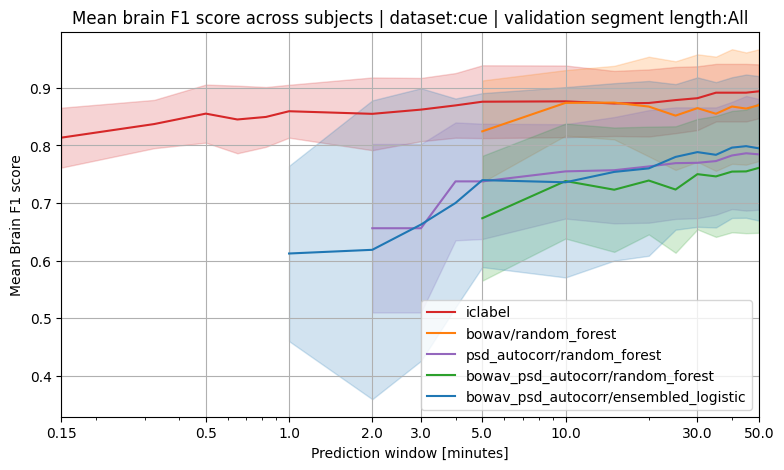

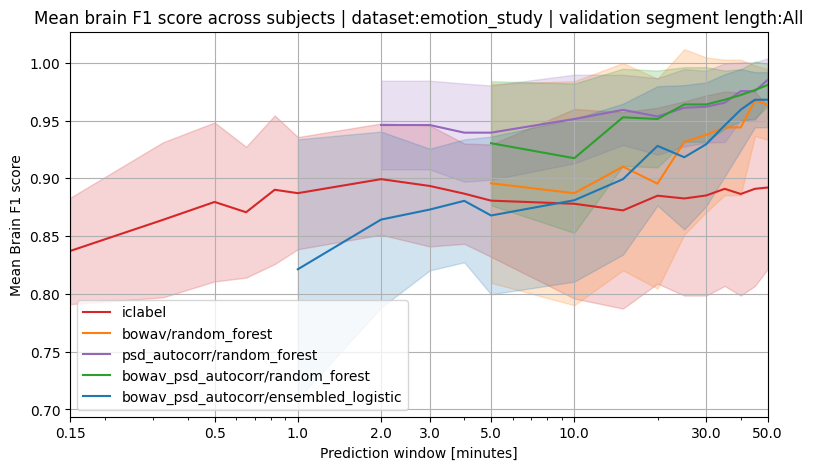

In [ ]:
global_x_ticks = np.array([0.15, 0.5, 1, 2, 3, 5, 10, 30, 50])
# colors = {"bowav/logistic": "blue", "psd_autocorr/logistic": "green", "bowav/random_forest": "orange", "psd_autocorr/random_forest": "purple"}
colors = {"bowav_psd_autocorr/random_forest": "green", "bowav/random_forest": "orange", "psd_autocorr/random_forest": "purple", "bowav_psd_autocorr/ensembled_logistic": "blue"}
val_seg_len_map = {-1: "All", 300: "5-minutes"}
# The *.mat files with the ICLabel labels were manually created for the following prediction times
    #     9.0,    19.5,    30.0,    39.0,    49.5
    #    60.0,   120.0,   180.0,   240.0,   300.0
    #   300.0,   600.0,   900.0,  1200.0,  1500.0
    #  1800.0,  2100.0,  2400.0,  2700.0,  3000.0
validation_times_ = 1.5 * (validation_times // 1.5)
for eval_dataset in ["cue", "emotion_study"]:
    # For ICLabel, the values for feature_extractor, classifier_type, train_dataset, and validation_segment_length
    # don't matter, as they are not used.
    config = EvalConfig(
        eval_dataset=eval_dataset,
        feature_extractor="bowav",
        classifier_type="logistic",
        validation_segment_length=-1,
        root=root,
    )
    iclabel_df = calculate_iclabel_f1_scores(config, validation_times_)
    iclabel_df = iclabel_df.rename(
            columns={
                "Brain F1 score - iclabel": "iclabel",
            }
        )

    for validation_segment_len in [-1]:  #  [-1, 300]:
        fig, ax = plt.subplots(figsize=(9, 5))
        ax = plot_line_with_error_area(
            ax,
            iclabel_df,
            "Prediction window [minutes]",
            "iclabel",
            "StdDev - iclabel",
            color="red"
        )
        for classifier_type in ["random_forest", "logistic", "ensembled_logistic"]:  # ["random_forest", "logistic"]:
            for feature_extractor_str in ["bowav", "psd_autocorr", "bowav_psd_autocorr"]:
                try:
                    df = mean_std_df[eval_dataset][feature_extractor_str][classifier_type][validation_segment_len]
                    # rename columns to also include the classifier type (e.g., "Brain F1 score - bowav" -> "Brain F1 score - bowav-logistic")
                    df = df.rename(
                        columns={
                            "Brain F1 score - " + feature_extractor_str: f"{feature_extractor_str}/{classifier_type}",
                            "StdDev - " + feature_extractor_str: f"StdDev - {feature_extractor_str}/{classifier_type}"
                        }
                    )
                    ax = plot_line_with_error_area(
                        ax,
                        df,
                        "Prediction window [minutes]",
                        f"{feature_extractor_str}/{classifier_type}",
                        f"StdDev - {feature_extractor_str}/{classifier_type}",
                        color=colors[f"{feature_extractor_str}/{classifier_type}"]
                    )
                except KeyError:
                    print(f"KeyError: {feature_extractor_str}/{classifier_type} not found. Skipping...")
                    continue

        ax.set_xscale("log")
        ax.set_xticks(global_x_ticks, labels=global_x_ticks)
        ax.set_xlim(global_x_ticks[0], 50)
        ax.set_xlabel("Prediction window [minutes]")
        ax.set_ylabel("Mean Brain F1 score")
        ax.set_title(f"Mean brain F1 score across subjects | dataset:{eval_dataset} | validation segment length:{val_seg_len_map[validation_segment_len]}")
        ax.legend()
        ax.grid(True)